## Netflix - A data analysis approach using python 🐍
The objective of this study is given by:
* Top 20 countries with highest content (Movies + Shows).
* What is the trend movie that is winning over the last years?
* Top 10 Show Type appeared most on Netflix
* Top 5 cast appeared most on Netflix.
* Share if TV shows and movie in top 5 countries.

The data visualization and analysis is carried out as follows:

In [2]:
#Importing pandas, numpy and matplotlib to analyze the data and visualize it.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
nfdata_df = pd.read_csv("netflix_data.csv")
nfdata_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
nfdata_df.describe().T 

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [4]:
nfdata_df.info()
#Obtaining info about the dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
nfdata_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Null values ​​are filled with "Unknown" values.

In [17]:
nfdata_df.director.fillna(value="Unknown",inplace=True)
nfdata_df.cast.fillna(value="Unknown",inplace=True)
nfdata_df.country.fillna(value="Unknown",inplace=True)
nfdata_df.date_added.fillna(value="Unknown",inplace=True)

In [6]:
nfdata_df["country"].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [19]:
#iterate over Data frame
new_nfdata_df = nfdata_df

for index, row in new_nfdata_df.iterrows():
    if str(row['country']).count(",") > 0:
        country_list = str(row['country']).split(",")
        for ctry in country_list:
            new_row = {"show_id":row['show_id'], "type":row['type'], "title":row['title'], "director":row['director'], "cast":row['cast'],
                       "country":ctry.strip(), "date_added":row['date_added'], "release_year":row['release_year'], "rating":row['rating'],
                       "duration":row['duration'], "listed_in":row['listed_in'], "description":row['description']}
            new_nfdata_df = new_nfdata_df.append(new_row, ignore_index = True)
            #now drop the rwo with multiple countries to avoid duplication.

            
#Seperate loop to drop the records with mul;ti-countries to avoid duplication
for index, row in new_nfdata_df.iterrows():
    if str(row['country']).count(",") > 0:
        new_nfdata_df.drop(index, inplace=True)

C:\Users\MiPC\AppData\Local\Temp/ipykernel_90244/69473811.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_nfdata_df = new_nfdata_df.append(new_row, ignore_index = True)
C:\Users\MiPC\AppData\Local\Temp/ipykernel_90244/69473811.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_nfdata_df = new_nfdata_df.append(new_row, ignore_index = True)
C:\Users\MiPC\AppData\Local\Temp/ipykernel_90244/69473811.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_nfdata_df = new_nfdata_df.append(new_row, ignore_index = True)
C:\Users\MiPC\AppData\Local\Temp/ipykernel_90244/69473811.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

In [20]:
new_nfdata_df[['MMDD_added','year_added']] = new_nfdata_df.date_added.str.split(',',expand=True)
new_nfdata_df[['month_added','day_added','dropcol']] = new_nfdata_df.MMDD_added.str.split(' ',expand=True)
new_nfdata_df.drop({'date_added', 'MMDD_added', 'dropcol'} , axis=1, inplace=True)
new_nfdata_df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,25
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,24
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,24
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,24


# Ob 1: Top 20 countries with highest content (Movies + Shows).

Text(0.5, 1.0, 'Total shows (TV Show + Movies)')

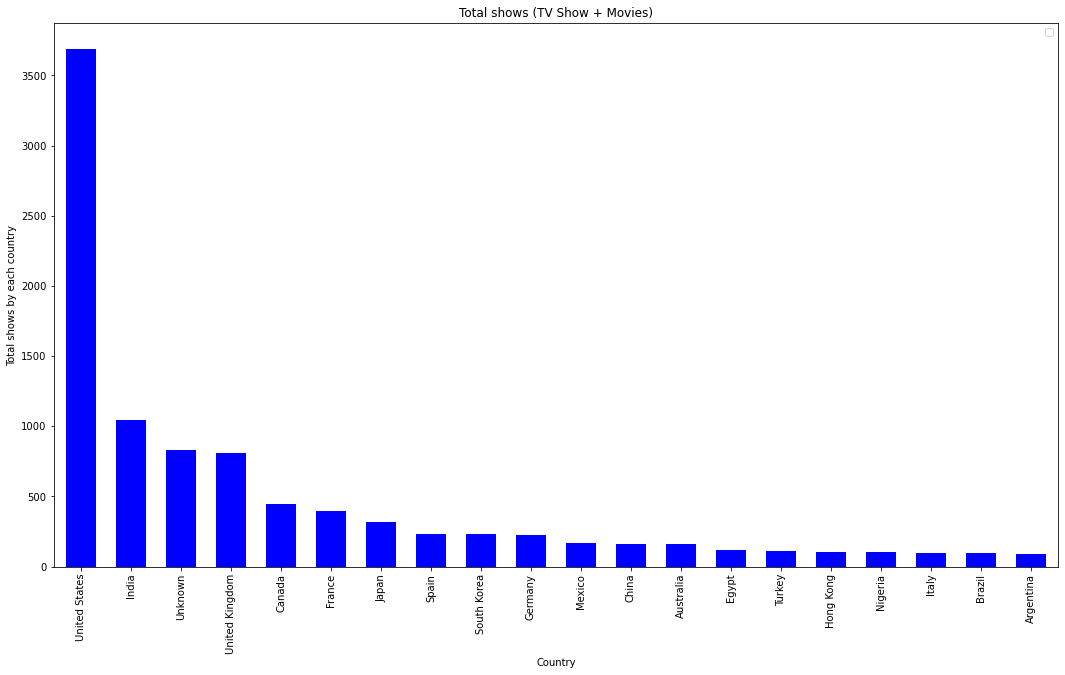

In [21]:
type_df = new_nfdata_df.groupby(by=['country', 'type']).size().reset_index(name='counts')

movie_df = type_df[type_df['type'] == 'Movie'][['country', 'counts']]
movie_df.sort_values(by='counts', inplace=True,ascending=False)
movie_df['country']=movie_df['country'].astype(str)
movie_df. rename(columns = {'counts':'moviecounts'}, inplace = True)

tv_df = type_df[type_df['type'] == 'TV Show'][['country', 'counts']]
tv_df.sort_values(by='counts', inplace=True,ascending=False)
tv_df['country']=tv_df['country'].astype(str)
tv_df.rename(columns = {'counts':'tvcounts'}, inplace = True)

join_type_df = movie_df.join(tv_df.set_index('country'), how="outer", on='country')
join_type_df['totalshows'] = join_type_df['moviecounts'] + join_type_df['tvcounts']
join_type_df.sort_values(by='totalshows', inplace=True,ascending=False)
join_type_df[:6].plot(y='totalshows', x='country', kind='bar', figsize=(18,10),color = "blue",width=0.6)
plt.xlabel('Country')
plt.ylabel('Total shows by each country')
plt.legend('')
plt.title('Total shows (TV Show + Movies)')

# Ob 2: What is the trend movie that is winning over the last years?

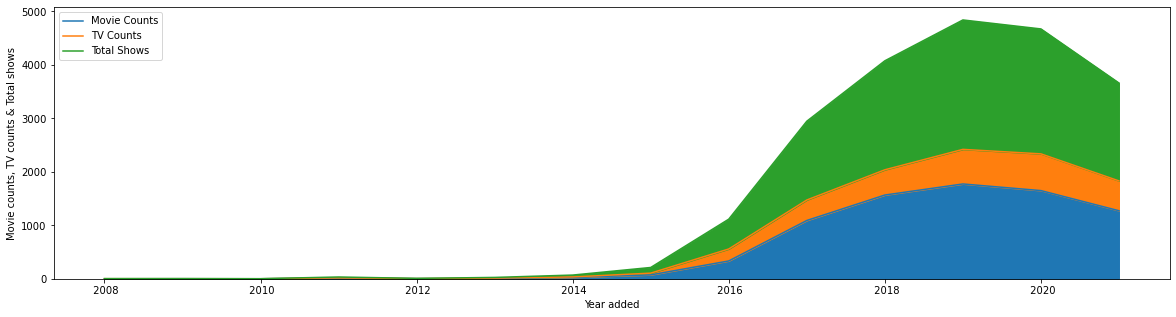

In [22]:
release_df = new_nfdata_df.groupby(by=['year_added', 'type']).size().reset_index(name='counts')

movie_df = release_df[release_df['type'] == 'Movie'][['year_added', 'counts']]
movie_df.sort_values(by='counts', inplace=True,ascending=False)
movie_df['counts'] = movie_df['counts'].fillna(0)
movie_df. rename(columns = {'counts':'moviecounts'}, inplace = True)

tv_df = release_df[release_df['type'] == 'TV Show'][['year_added', 'counts']]
tv_df.sort_values(by='counts', inplace=True,ascending=False)
tv_df['counts'] = tv_df['counts'].fillna(0)
tv_df.rename(columns = {'counts':'tvcounts'}, inplace = True)

join_type_year = movie_df.join(tv_df.set_index('year_added'), how="outer", on='year_added')
join_type_year['tvcounts'] = join_type_year['tvcounts'].fillna(0)
join_type_year['totalshows'] = join_type_year['moviecounts'] + join_type_year['tvcounts']
join_type_year.sort_values(by='year_added', inplace=True,ascending=True)

join_type_year.plot(x='year_added', kind='area', figsize=(20,5))
plt.xlabel('Year added')
plt.xticks=join_type_year['year_added']
plt.ylabel('Movie counts, TV counts & Total shows')
plt.legend(['Movie Counts','TV Counts','Total Shows'])

# Ob 3: Top 10 Show Type appeared most on Netflix

<AxesSubplot:xlabel='listed_in'>

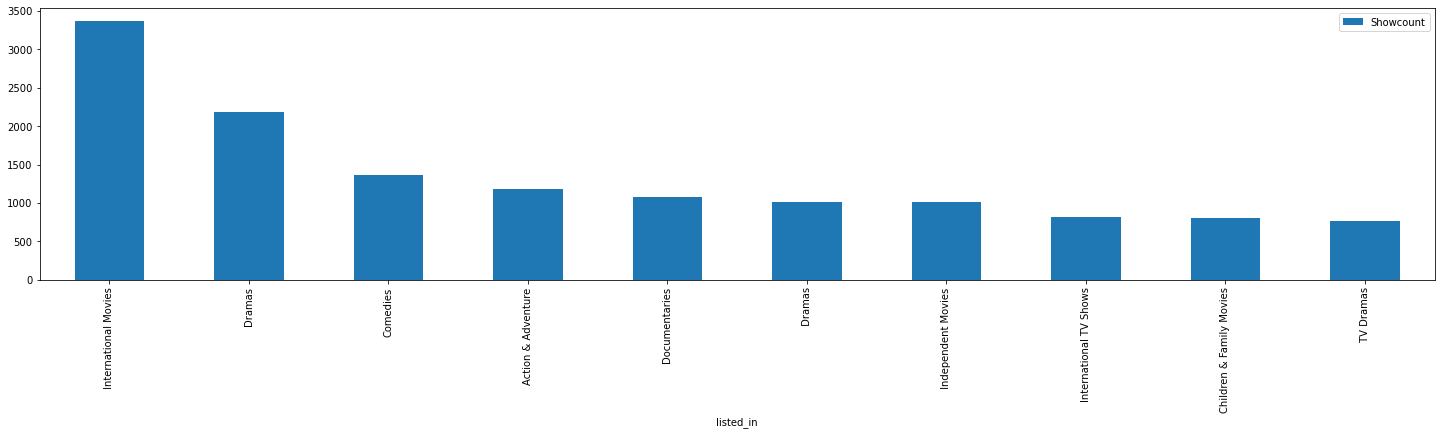

In [11]:
listed_in = []
listed_in.append(','.join(str(x) for x in new_nfdata_df['listed_in'].dropna()))
listed_in_df = pd.DataFrame(listed_in)
listed_in_df.rename(columns = {0:'listed_in'}, inplace=True)
listed_in_df = listed_in_df['listed_in'].str.split(',', expand=True)
listed_in_df = listed_in_df.T
listed_in_df.rename(columns = {0:'listed_in'}, inplace=True)
listed_in_df.dropna(inplace=True)

listed_in_df_grp = listed_in_df.groupby(by=['listed_in']).size().reset_index(name='counts')
listed_in_df_grp.sort_values(by='counts', inplace=True,ascending=False)
listed_in_df_grp.rename(columns = {'counts':'Showcount'}, inplace=True)
listed_in_df_grp[:10].plot(y='Showcount', x='listed_in', kind='bar', figsize=(25,5))
#plt.xticks(rotation='horizontal')

# Ob 4: Top 5 cast appeared most on Netflix.

<AxesSubplot:xlabel='cast'>

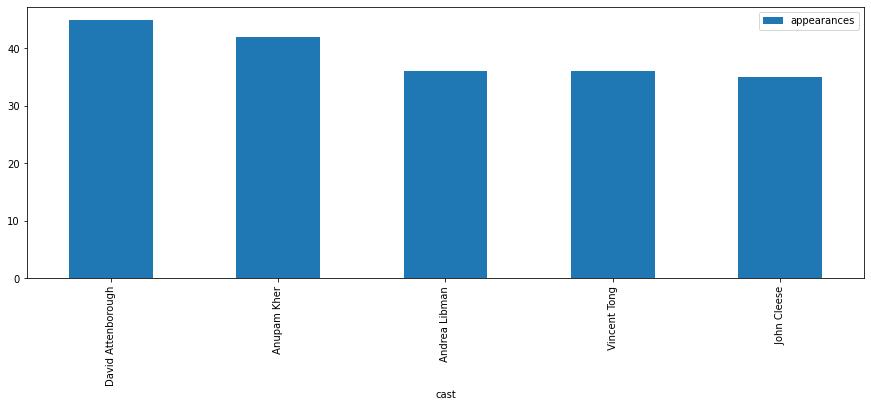

In [12]:
all_cast = []
all_cast.append(','.join(str(x) for x in new_nfdata_df['cast'].dropna()))
all_cast_df = pd.DataFrame(all_cast)
all_cast_df.rename(columns = {0:'cast'}, inplace=True)
all_cast_df = all_cast_df['cast'].str.split(',', expand=True)
all_cast_df = all_cast_df.T
all_cast_df.rename(columns = {0:'cast'}, inplace=True)
all_cast_df.dropna(inplace=True)

all_cast_df_grp = all_cast_df.groupby(by=['cast']).size().reset_index(name='counts')
all_cast_df_grp.sort_values(by='counts', inplace=True,ascending=False)
all_cast_df_grp.rename(columns = {'counts':'appearances'}, inplace=True)
all_cast_df_grp[:5].plot(y='appearances', x='cast', kind='bar', figsize=(15,5))

# Ob 5: Share if TV shows and movie in top 5 countries.

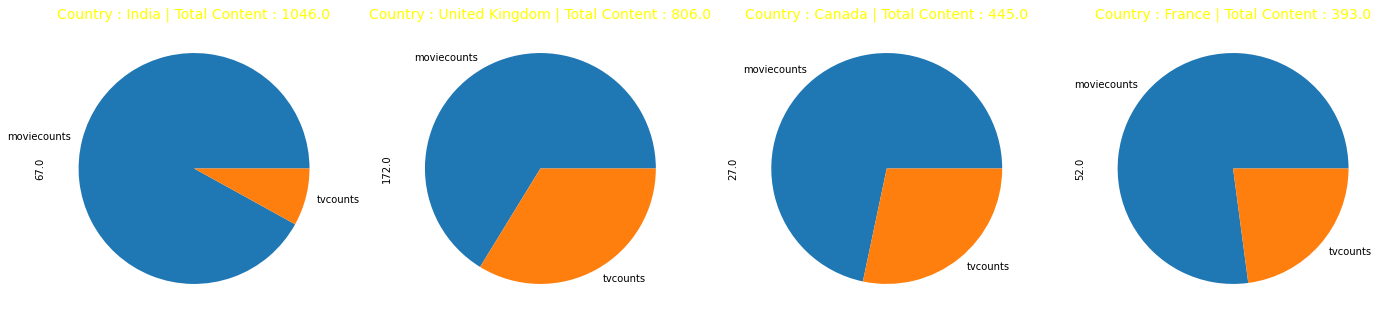

In [13]:
for i in range(1,5):
    plt.subplot(1,5,i)
    strTitle = "Country : " + join_type_df['country'].iloc[i] + " | Total Content : " + str(join_type_df['totalshows'].iloc[i])
    join_type_df[['moviecounts','tvcounts']].iloc[i].plot(kind='pie', figsize=(30,25))
    plt.title(label=strTitle, fontsize=14, color="yellow")